In [19]:
## Initialization

%reset -f


# Part 1. CNN의 연산 이해하기

#### 1) Resizing

###### 이미지 크기 조정은 CNN에서 입력 이미지의 크기를 표준화 (또는 단일화)하거나, 네트워크의 계산 효율을 높이기 위해 수행됨

* Resizing은 이미지의 차원을 변경하는 과정임. 이는 다양한 소스에서 얻은 이미지들이 다른 해상도를 가질 때, 특히 유용함
* 또한, 이미지 크기를 줄임으로써 메모리 사용량을 감소시키고, 처리 속도를 향상시킬 수 있음
* Resizing은 주로 최근접 이웃(nearest neighbor) 또는 선형 보간(linear interpolation) 방법을 사용하여 수행됨

#### 2) 2d Convolution

##### 2D 컨볼루션은 이미지에서 유용한 특징을 추출하는 데 사용됨. 이는 CNN의 핵심 연산으로, 다양한 필터(커널)를 이미지에 적용하여 특징 맵(feature maps)을 생성함.

* 2D 컨볼루션은 이미지에 작은 윈도우(커널)를 슬라이딩하며 적용하는 연산
* 이 윈도우는 각 위치에서의 픽셀 값들과 커널 값들의 가중합을 계산하여 결과 픽셀 값을 생성
* 커널은 에지 검출, 블러링, 샤프닝 등 특정 이미지 처리 기능을 정의
* 컨볼루션의 결과로 얻은 특징 맵은 원본 이미지에서 중요한 정보를 강조하여 다음 네트워크 레이어로 전달

#### 3) Max Pooling

##### 최대 풀링(max pooling)은 특징 맵의 크기를 줄이면서 중요한 정보를 유지하는 데 사용됨

* 최대 풀링은 주어진 영역(예: 2x2) 내에서 최대값을 선택하여 새로운, 축소된 특징 맵을 생성하는 방법
* 이미지의 공간 차원을 줄이면서도 중요한 특징은 보존하는 효과가 있음
* 결과적으로, 신경망의 과적합을 방지하고, 계산 효율성을 높이며, 특징의 위치 변화에 대한 내성을 증가시킬 수 있음

#### 4) LeNet-5의 C-P-C-P

##### LeNet-5는 C (Convolution) - P (Max Pooling) - C - P를 수행한 결과에 대해 은닉층과 출력층을 적층하는 구조를 사용함.

* 이 C-P-C-P 구조에 대해 하나의 커널을 선택하여 수행 과정을 관찰할 수 있음

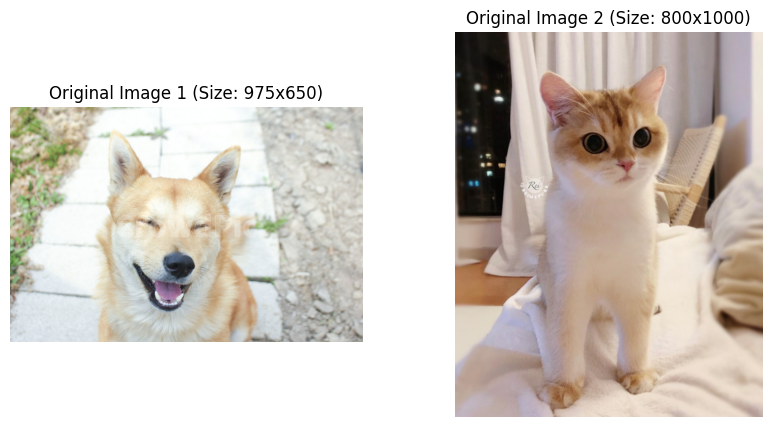

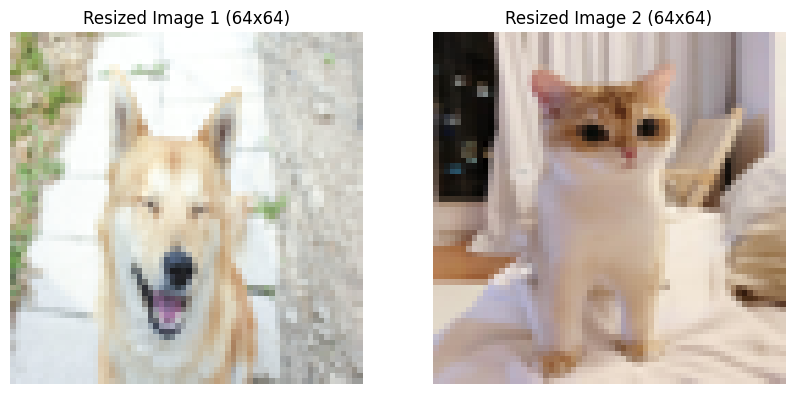

In [20]:
## Part 1-1) Resizing 이해하기
import matplotlib.pyplot as plt
from PIL import Image

""" 구현 및 수정 대상
# a. 이미지 파일 경로: 주어진 두 개의 이미지를 본인의 환경에 맞게 동작하게 수정
# b. 이미지의 Resizing
"""

# 이미지 파일 경로: 주어진 두 개의 이미지를 본인의 환경에 맞게 동작하게 수정
image_path1 = "content/D3-Example-Dog.jpg"  # 필요시 수정할 것
image_path2 = "content/D3-Example-Cat.jpg"  # 필요시 수정할 것

# 이미지 파일 로드
image1 = Image.open(image_path1)
image2 = Image.open(image_path2)

# 이미지 사이즈 조정 (64x64)
image1_resized = image1.resize((64, 64))
image2_resized = image2.resize((64, 64))

""" 이하의 코드는 수정이 필요하지 않음 """
# 이미지 디스플레이 설정
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1행 2열, 전체 크기 설정

# 첫 번째 이미지 디스플레이 (원본)
axs[0].imshow(image1)
axs[0].axis("off")  # 축 제거
axs[0].set_title(
    f"Original Image 1 (Size: {image1.size[0]}x{image1.size[1]})"
)  # 제목 설정, 크기 포함

# 두 번째 이미지 디스플레이 (원본)
axs[1].imshow(image2)
axs[1].axis("off")  # 축 제거
axs[1].set_title(
    f"Original Image 2 (Size: {image2.size[0]}x{image2.size[1]})"
)  # 제목 설정, 크기 포함

plt.show()  # 화면에 표시

# 변환된 이미지 디스플레이 설정
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1행 2열, 전체 크기 설정

# 첫 번째 이미지 디스플레이 (64x64)
axs[0].imshow(image1_resized)
axs[0].axis("off")  # 축 제거
axs[0].set_title("Resized Image 1 (64x64)")  # 제목 설정

# 두 번째 이미지 디스플레이 (64x64)
axs[1].imshow(image2_resized)
axs[1].axis("off")  # 축 제거
axs[1].set_title("Resized Image 2 (64x64)")  # 제목 설정

plt.show()  # 화면에 표시

In [21]:
## Part 1-2) 2d Convolution 수행 환경 설정하기: 2d 컨볼루션 함수와 커널
import numpy as np

""" 구현 및 수정 대상
# a. Convolution 연산에서 padding = 'same'의 기능
# b. Convolution 연산에서 kernel 연산
"""


# 완성해야 할 함수: padding과 kernel 연산을 완성해야 함
def convolve2d(image, kernel, padding="same"):
    """2D convolution of an image with a given kernel with padding options."""
    # Kernel flipping
    kernel = np.flipud(np.fliplr(kernel))

    # Image dimensions
    x_img, y_img = image.shape

    # Kernel dimensions
    x_ker, y_ker = kernel.shape

    # Padding calculation
    if padding == "same":  # Convolution 수행 전후의 이미지 크기가 동일해야 함
        pad_x = (x_ker -1) // 2  # 필요하다면 수정
        pad_y = (y_ker - 1) // 2   # 필요하다면 수정
    elif padding == "valid":
        pad_x = pad_y = 0
    elif padding == "full":
        pad_x = x_ker - 1
        pad_y = y_ker - 1
    else:
        raise ValueError("Padding type must be 'same', 'valid', or 'full'")

    # Apply padding to the image
    padded_image = np.pad(
        image, ((pad_x, pad_x), (pad_y, pad_y)), mode="constant", constant_values=0
    )

    # Shape of the output image
    x_out = x_img - x_ker + 1 + 2 * pad_x
    y_out = y_img - y_ker + 1 + 2 * pad_y
    output = np.zeros((x_out, y_out))

    # Apply the kernel to the image
    """ 2d 컨볼루션 연산 입력 부분: 시작 """
    for i in range(x_out):
            for j in range(y_out):
                output[i, j] = (padded_image[i:i + x_ker, j:j + y_ker] * kernel).sum()
    """ 2d 컨볼루션 연산 입력 부분: 종료 """
    return output


average_kernel = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]) / 9

laplacian_kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])

gaussian_kernel = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16

sharpening_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

sobel_horizontal = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

sobel_vertical = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)
(64, 64)


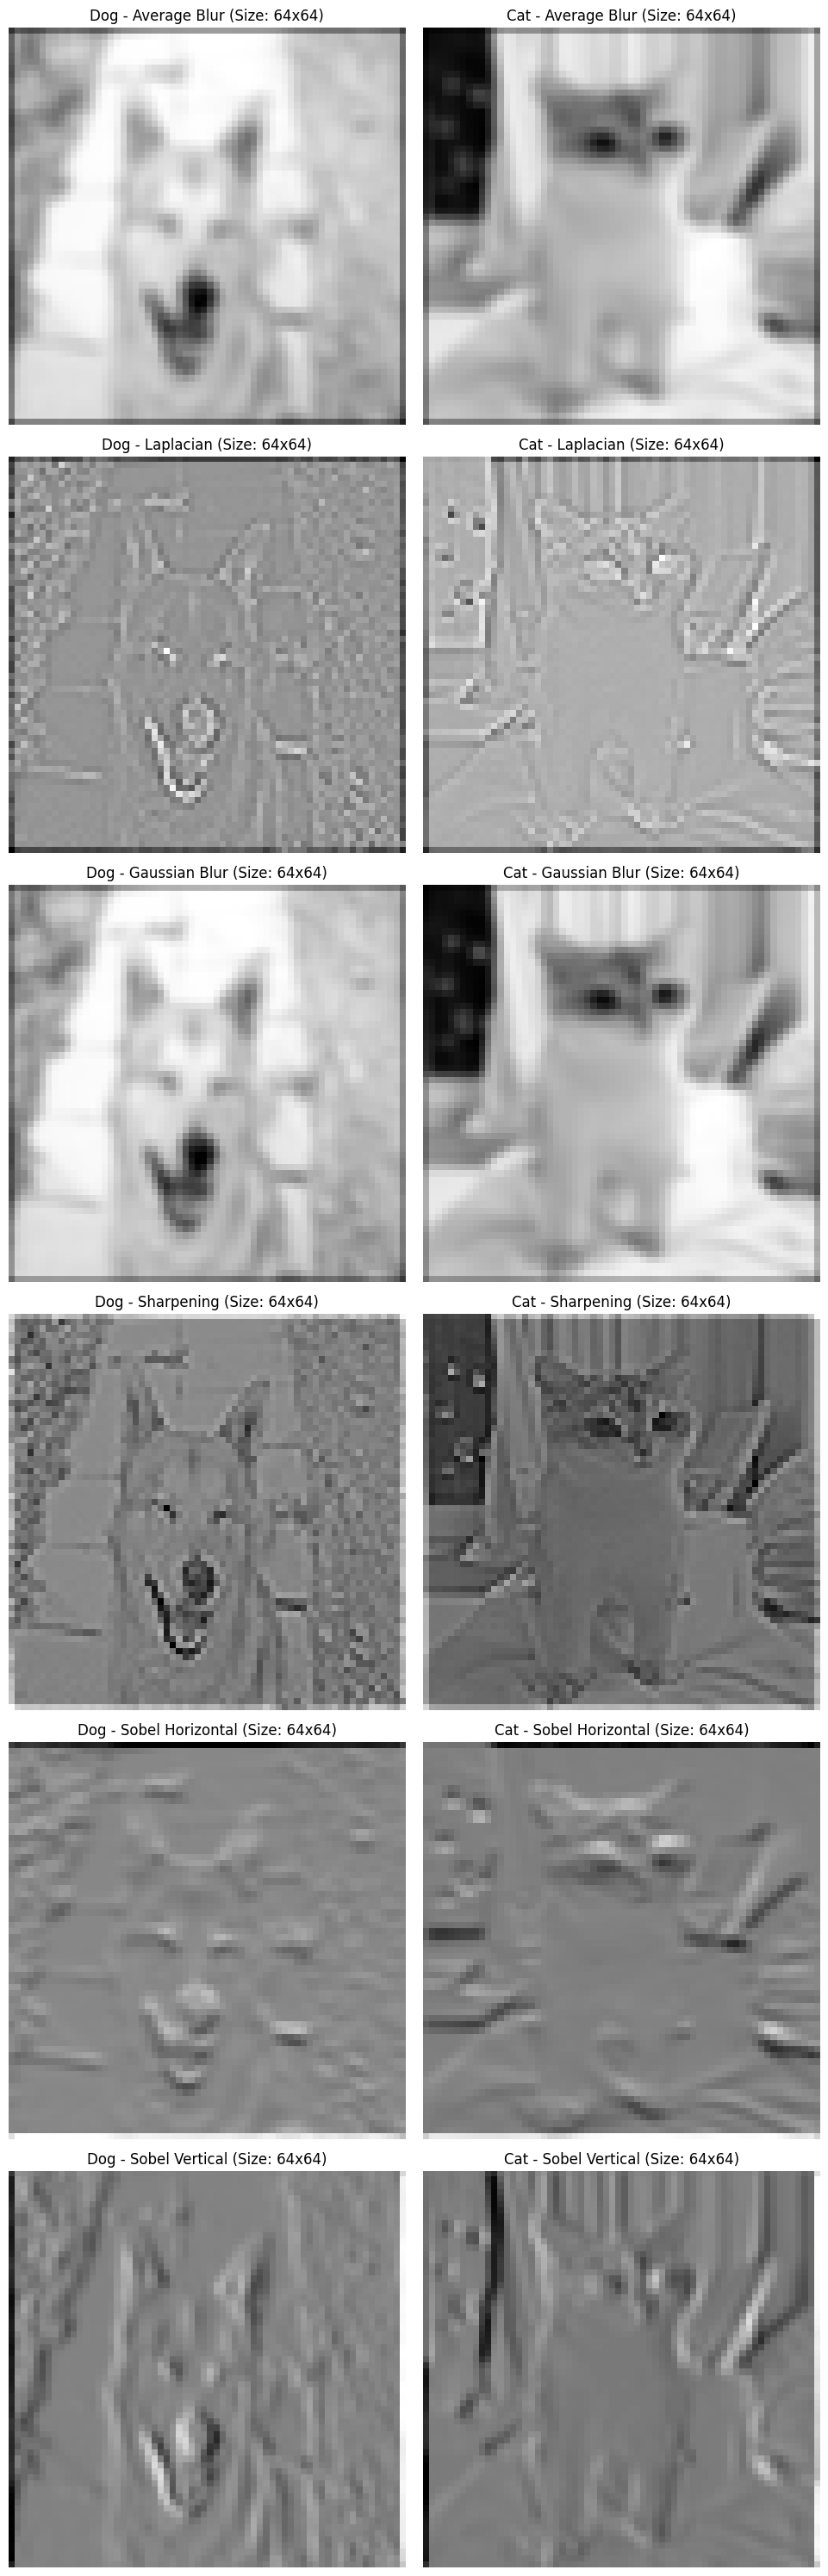

In [22]:
## Part 1-2) 2d Convolution 수행 하기
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

""" 구현 및 수정 대상
# a. padding='same'이 수행되도록 할 것
     출력 이미지의 제목을 통해 올바르게 설정되었는지 확인할 것
"""

# 이미지 불러오기
image1_conv = image1_resized.convert("L")  # 이미지를 흑백으로 변환
image1_np = np.array(image1_conv)  # NumPy 배열로 변환
image2_conv = image2_resized.convert("L")  # 이미지를 흑백으로 변환
image2_np = np.array(image2_conv)  # NumPy 배열로 변환

# 커널 리스트
kernels = {
    "Average Blur": average_kernel,
    "Laplacian": laplacian_kernel,
    "Gaussian Blur": gaussian_kernel,
    "Sharpening": sharpening_kernel,
    "Sobel Horizontal": sobel_horizontal,
    "Sobel Vertical": sobel_vertical,
}

# 결과 표시
num_kernels = len(kernels)
fig, axs = plt.subplots(num_kernels, 2, figsize=(10, 5 * num_kernels))

for idx, (name, kernel) in enumerate(kernels.items()):
    # 각 이미지에 대해 커널 적용
    result_image1 = convolve2d(image1_np, kernel, 'same')  # 필요하다면 매개변수를 수정
    result_image2 = convolve2d(image2_np, kernel, 'same')  # 필요하다면 매개변수를 수정
    #결과의 이미지 크기
    print(result_image1.shape)
    print(result_image2.shape)
    # 결과 이미지 표시 (개)
    axs[idx, 0].imshow(result_image1, cmap="gray")
    axs[idx, 0].axis("off")
    axs[idx, 0].set_title(
        f"Dog - {name} (Size: {result_image1.shape[1]}x{result_image1.shape[0]})"
    )

    # 결과 이미지 표시 (고양이)
    axs[idx, 1].imshow(result_image2, cmap="gray")
    axs[idx, 1].axis("off")
    axs[idx, 1].set_title(
        f"Cat - {name} (Size: {result_image2.shape[1]}x{result_image2.shape[0]})"
    )

plt.tight_layout()
plt.show()

before conv2d
(64, 64)
(64, 64)
after conv2d
(64, 64)
(64, 64)
before conv2d
(64, 64)
(64, 64)
after conv2d
(64, 64)
(64, 64)
before conv2d
(64, 64)
(64, 64)
after conv2d
(64, 64)
(64, 64)
before conv2d
(64, 64)
(64, 64)
after conv2d
(64, 64)
(64, 64)
before conv2d
(64, 64)
(64, 64)
after conv2d
(64, 64)
(64, 64)
before conv2d
(64, 64)
(64, 64)
after conv2d
(64, 64)
(64, 64)


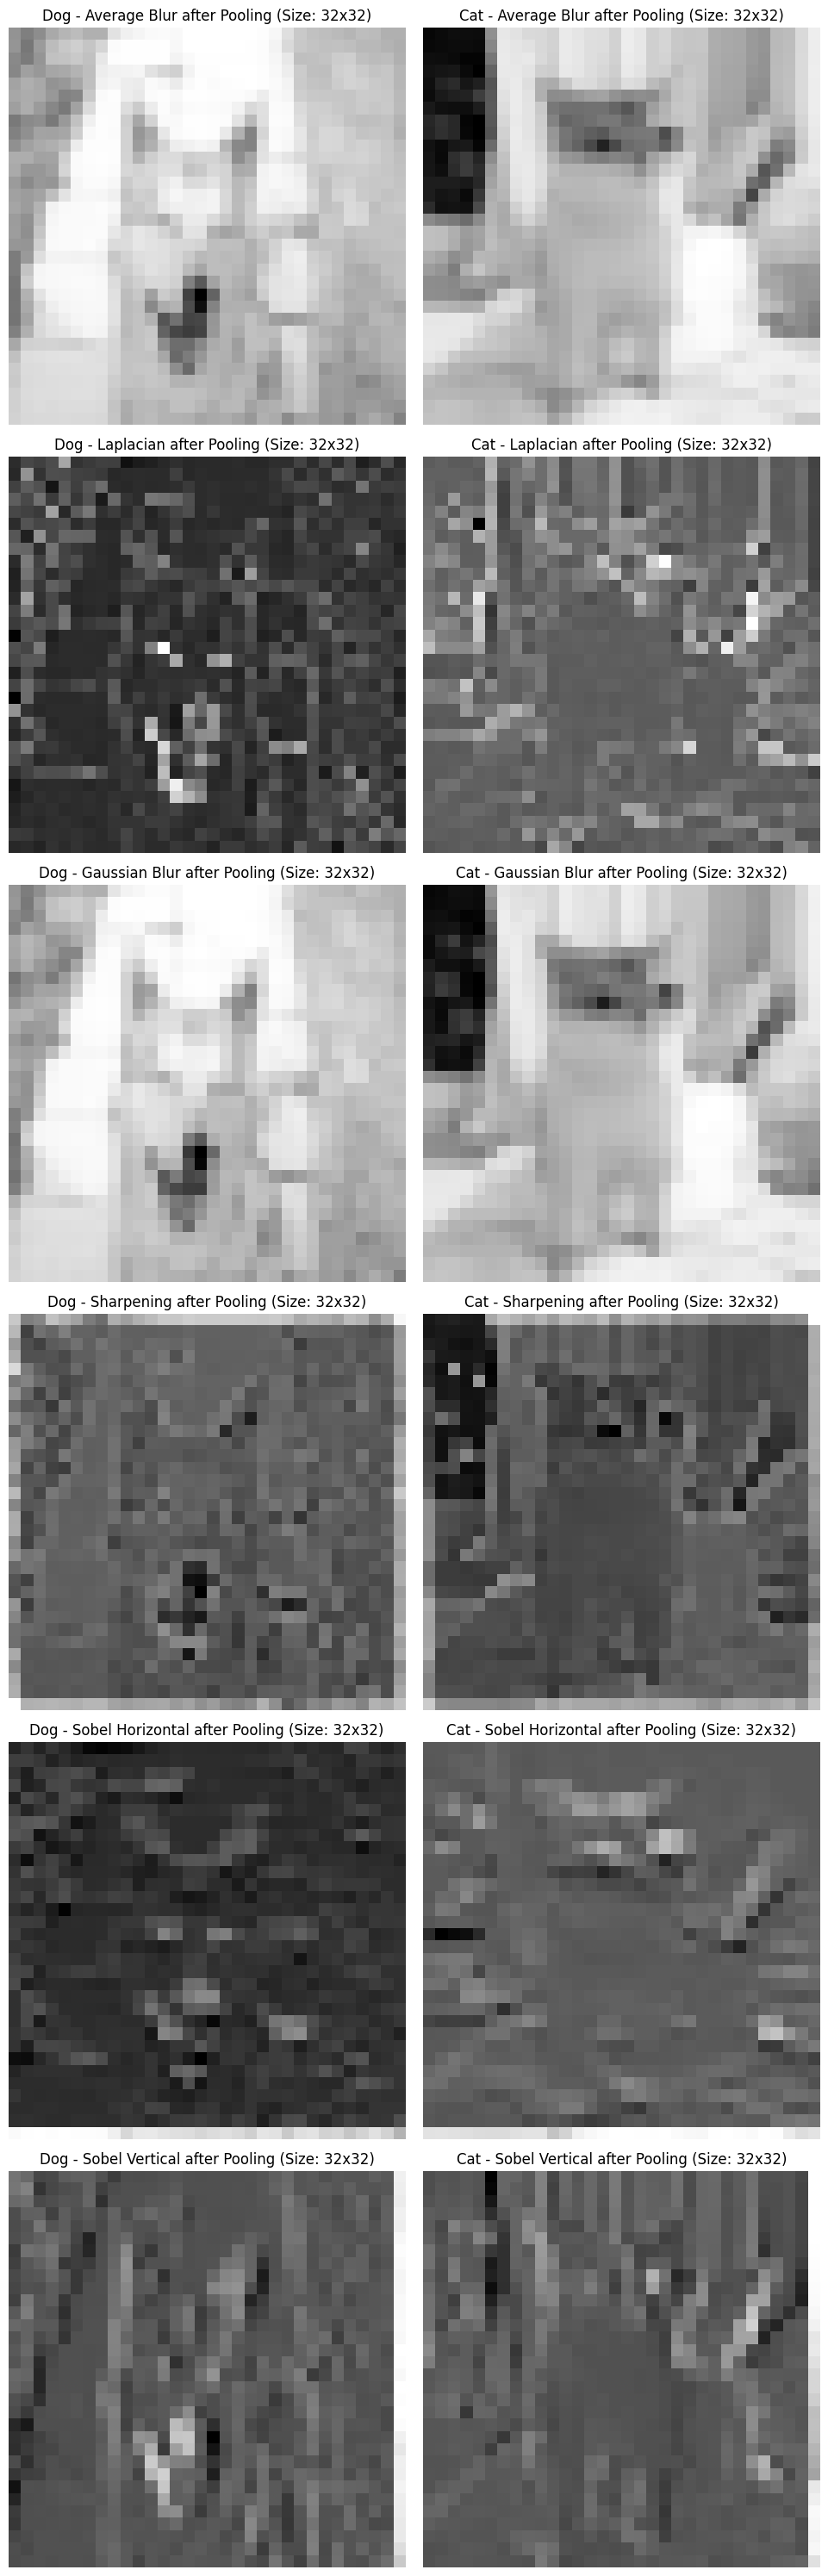

In [23]:
## Part 1-3) Max Pooling 수행 결과 확인하기
""" 구현 및 수정 대상
# a. max pooling 결과물을 한 공간 할당 기능을 구현할 것
# b. max pooling의 기능을 구현할 것
"""


def max_pooling(image, pool_size=(2, 2)):
    """Apply 2x2 max pooling to an image."""
    img_height, img_width = image.shape
    # print(img_height, img_width)
    pool_height, pool_width = pool_size
    """ 공간 할당 연산 입력 부분: 시작 """
    pooled_height = img_height// pool_height # 공간 할당
    pooled_width = img_width // pool_width # 공간 할당
    """ 공간 할당 연산 입력 부분: 끝 """

    # Initialize the output pooled image
    pooled_image = np.zeros((pooled_height, pooled_width))
    """ Max Pooling 연산 입력 부분: 시작 """
    pooled_image[0, 0] = 0
    for i in range(pooled_height):
        for j in range(pooled_width):
            h_start = i * pool_height
            h_end = h_start + pool_height
            w_start = j * pool_width  
            w_end = w_start + pool_width
            pooled_image [i,j] = np.max(image[h_start:h_end, w_start:w_end])

    """ Max Pooling 연산 입력 부분: 종료 """
    return pooled_image


# 커널 적용 및 풀링 결과 표시
fig, axs = plt.subplots(num_kernels, 2, figsize=(10, 5 * num_kernels))

for idx, (name, kernel) in enumerate(kernels.items()):
    print("before conv2d")
    print(image1_np.shape)
    print(image2_np.shape)
    # 커널 적용
    result_image1 = convolve2d(image1_np, kernel)
    result_image2 = convolve2d(image2_np, kernel)
    #after conv
    print("after conv2d")
    print(result_image1.shape)
    print(result_image2.shape)
    # 2x2 최대 풀링 적용
    pooled_image1 = max_pooling(result_image1)
    pooled_image2 = max_pooling(result_image2)
    
    # 결과 이미지 표시 (개)
    axs[idx, 0].imshow(pooled_image1, cmap="gray")
    axs[idx, 0].axis("off")
    axs[idx, 0].set_title(
        f"Dog - {name} after Pooling (Size: {pooled_image1.shape[1]}x{pooled_image1.shape[0]})"
    )

    # 결과 이미지 표시 (고양이)
    axs[idx, 1].imshow(pooled_image2, cmap="gray")
    axs[idx, 1].axis("off")
    axs[idx, 1].set_title(
        f"Cat - {name} after Pooling (Size: {pooled_image2.shape[1]}x{pooled_image2.shape[0]})"
    )

plt.tight_layout()
plt.show()

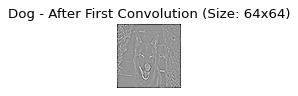

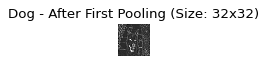

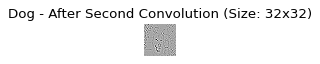

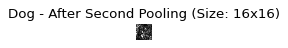

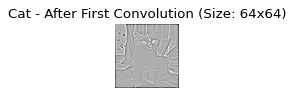

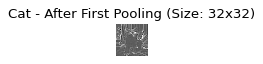

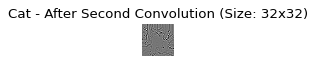

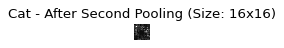

In [24]:
## Part 1-4) C-P-C-P 수행 과정 살펴보기
import matplotlib.pyplot as plt

""" 구현 및 수정 대상
# 없음. 단, 지금까지 제대로 구현했다면 그림의 크기는 아래와 같이 변화할 것.
        64x64 --> 32x32 --> 32x32 --> 16x16
# 가능하다면 매개변수를 바꾸어 실제 LeNet-5처럼 동작하게 해보자.
"""


# 디스플레이 함수 정의
def display_image_in_actual_size(im_data, title):
    dpi = 80
    height, width = im_data.shape
    # Figure size in inches
    figsize = width / float(dpi), height / float(dpi)

    fig = plt.figure(figsize=figsize, dpi=dpi)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis("off")

    # Update title to include image size
    updated_title = f"{title} (Size: {width}x{height})"
    ax.set_title(updated_title)

    ax.imshow(im_data, cmap="gray")
    plt.show()


# 이미지 처리
# 이미지 1
conv1_image1 = convolve2d(image1_np, laplacian_kernel)
pool1_image1 = max_pooling(conv1_image1)
conv2_image1 = convolve2d(pool1_image1, laplacian_kernel)
pool2_image1 = max_pooling(conv2_image1)

# 이미지 2
conv1_image2 = convolve2d(image2_np, laplacian_kernel)
pool1_image2 = max_pooling(conv1_image2)
conv2_image2 = convolve2d(pool1_image2, laplacian_kernel)
pool2_image2 = max_pooling(conv2_image2)

# 이미지 처리 후 각 단계에서 결과 표시
display_image_in_actual_size(conv1_image1, "Dog - After First Convolution")
display_image_in_actual_size(pool1_image1, "Dog - After First Pooling")
display_image_in_actual_size(conv2_image1, "Dog - After Second Convolution")
display_image_in_actual_size(pool2_image1, "Dog - After Second Pooling")

display_image_in_actual_size(conv1_image2, "Cat - After First Convolution")
display_image_in_actual_size(pool1_image2, "Cat - After First Pooling")
display_image_in_actual_size(conv2_image2, "Cat - After Second Convolution")
display_image_in_actual_size(pool2_image2, "Cat - After Second Pooling")

# Part 2. CNN 및 MLP 망 구성하기

#### 1) 입력 데이터 준비하기
* 압축 해제
* 이미지 불러오기
* 이미지 확인하기

#### 2) CNN망 및 MLP 망 구성하기
##### CNN과 MLP를 유사한 구조로 만든 후 둘의 성능 차이를 비교할 것

* CNN은 LeNet-5의 망 구조 C-P-C-P-C-Flatten-FCN-Output
* MLP는 LeNet-5에서 C-P-C-P를 제외한 나머지를 차용

#### 3) CNN/MLP 학습 수행하기

In [25]:
# ## Part 2-1) 이미지 가져오기: 압축 해제
# import zipfile
# import os

# """ 구현 및 수정 대상
# # a. D3-Cat-vs-Dog-Tr.zip를 원하는 폴더에 업로드 할 것
# # b. 이미지 압축파일 경로를 본인의 환경에 맞게 수정할 것
#     압축 해제가 되면 training_set 폴더가 생성되어야 함
#     (새로고침하여 확인할 수 있음)
# """


# def unzip_file(zip_path, extract_to="."):
#     """ZIP 파일 압축 해제 함수"""
#     with zipfile.ZipFile(zip_path, "r") as zip_ref:
#         zip_ref.extractall(extract_to)
#         print(f"Unzipped the files in {zip_path} to {extract_to}")


# # 사용 예제
# zip_file_path = "content/D3-Cat-vs-Dog-Tr.zip"  # 압축 파일 경로
# unzip_file(zip_file_path)
# print("Unzip Completed!")

FileNotFoundError: [Errno 2] No such file or directory: 'D3-Cat-vs-Dog-Tr.zip'

In [30]:
## Part 2-1) 이미지 가져오기: 이미지 불러오기
import os
import numpy as np
from keras.preprocessing.image import load_img, img_to_array
from keras.utils import to_categorical

""" 구현 및 수정 대상
# a. 압축이 해제된 경로를 본인의 환경에 맞게 수정할 것
# b. 함수 정의부 (헤더)를 잘 살펴보고
     이미지를 32 x 32로 가져오도록 함수 호출부를 수정할 것
"""


def load_images_from_folder(folder, target_size):
    images = []
    labels = []  # 0 for 'cat', 1 for 'dog'

    # '/cat' 폴더의 이미지 로드
    cat_folder = os.path.join(folder, "cats")
    for filename in os.listdir(cat_folder):
        img_path = os.path.join(cat_folder, filename)
        if img_path.endswith(".jpg"):
            img = load_img(img_path, target_size=target_size, color_mode="grayscale")
            images.append(img_to_array(img))
            labels.append(0)

    # '/dog' 폴더의 이미지 로드
    dog_folder = os.path.join(folder, "dogs")
    for filename in os.listdir(dog_folder):
        img_path = os.path.join(dog_folder, filename)
        if img_path.endswith(".jpg"):
            img = load_img(img_path, target_size=target_size, color_mode="grayscale")
            images.append(img_to_array(img))
            labels.append(1)

    # Convert lists to numpy arrays
    images = np.array(images)
    labels = np.array(labels)

    # 이미지 데이터 정규화 및 라벨 one-hot 인코딩
    images = images / 255.0
    labels = to_categorical(labels)

    return images, labels


# 사용 예제
folder_path = "training_set"  # 현재 폴더 경로 설정
X, y = load_images_from_folder(folder_path, (32,32))  # 필요하다면 수정할

print("Number of images:", len(y))
print("Shape of images:", X.shape)
print("Shape of labels:", y.shape)

KeyboardInterrupt: 

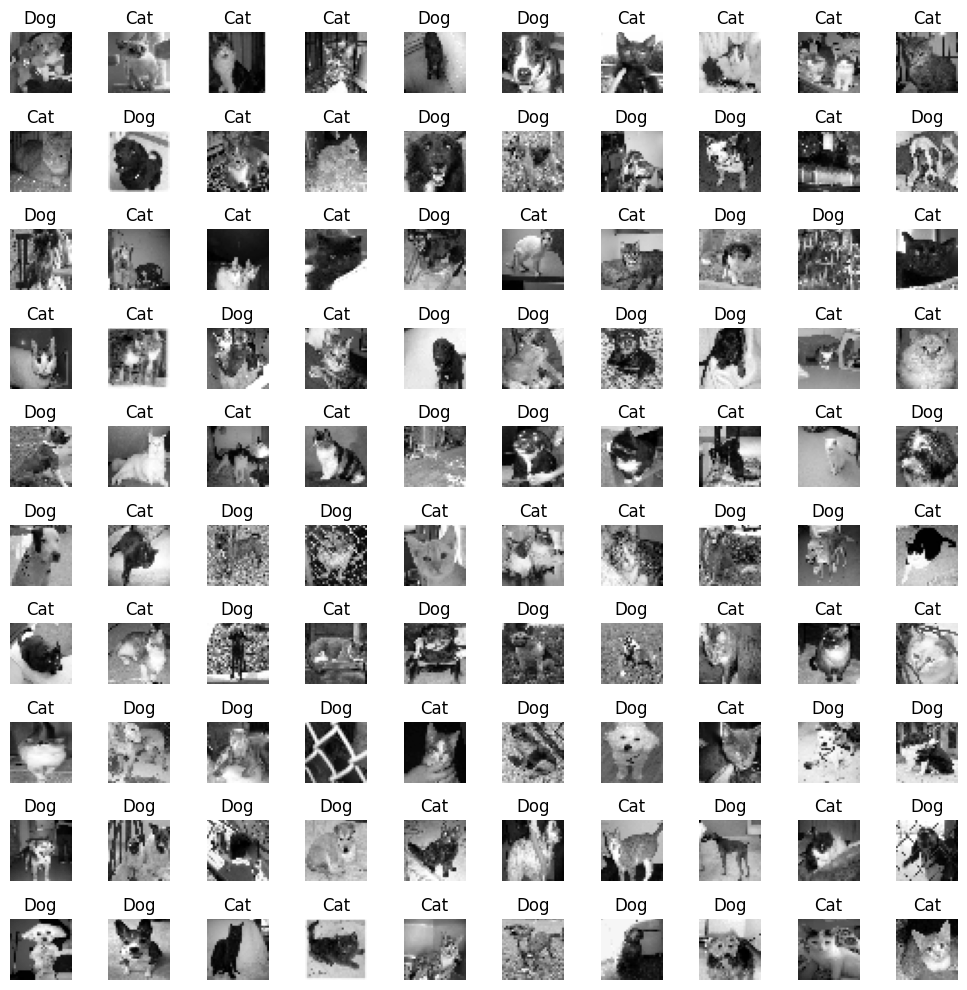

In [ ]:
## Part 2-1) 이미지 가져오기: 이미지 표시하기
import matplotlib.pyplot as plt
import numpy as np

""" 구현 및 수정 대상
# a. 압축이 해제된 경로를 본인의 환경에 맞게 수정할 것
# b. 함수 정의부 (헤더)를 잘 살펴보고
     이미지를 32 x 32로 가져오도록 함수 호출부를 수정할 것
"""


def plot_sample_images(X, y, target_size=[32, 32], n_samples=100, grid_dim=(10, 10)):
    """무작위로 선택한 이미지를 그리드에 출력합니다."""
    plt.figure(figsize=grid_dim)  # 그리드 크기 설정

    # 개와 고양이 이미지 각각에서 무작위로 n_samples/2 개 선택
    cats = np.where(y[:, 0] == 1)[0]
    dogs = np.where(y[:, 1] == 1)[0]
    selected_cats = np.random.choice(cats, n_samples // 2, replace=False)
    selected_dogs = np.random.choice(dogs, n_samples // 2, replace=False)
    selected_indices = np.concatenate((selected_cats, selected_dogs))
    np.random.shuffle(selected_indices)  # 선택된 인덱스를 섞습니다.

    for i, idx in enumerate(selected_indices):
        ax = plt.subplot(grid_dim[0], grid_dim[1], i + 1)
        plt.imshow(X[idx].reshape(target_size), cmap="gray")
        plt.title("Cat" if y[idx, 0] == 1 else "Dog")
        plt.axis("off")

    plt.tight_layout()
    plt.show()


# 이미지 출력 예제
plot_sample_images(X, y, n_samples=25, grid_dim=(5, 5))

In [ ]:
## Part 2-2) LeNet-5 망 구성하기
import tensorflow as tf
from keras import layers, models

""" 구현 및 수정 대상
# a. build_lenet5() 함수를 완성할 것
    본 함수는 lenet5를 모사한 신경망 모델을 생성하여 반환하는 기능을 함
# b. 각 계층은 아래의 가이드라인에 따라 구현할 것
    i) 모든 계층은 연속적으로 연결되어 있음
    ii) 입력을 포함하여 총 8개의 계층을 사용함
    iii) 계층은 Input-C1-P1-C2-P2-C3-Fltn-FCN-Output으로 구성됨
        C1: 2d Convoltion Layer,
            6개의 5x5 커널,
            padding: convolution 수행 전후의 이미지 크기가 같아야 함,
            activation: ReLU
        P1: 2d Max Pooling Layer,
            filter size: 2x2,
            stride: 2
        C2: 2d Convoltion Layer,
            16개의 5x5 커널,
            padding: convolution 수행 후 이미지가 축소됨,
            activation: ReLU
        P2: 2d Max Pooling Layer,
            filter size: 2x2,
            stride: 2
        C3: 2d Convoltion Layer,
            120개의 5x5 커널,
            padding: convolution 수행 후 이미지가 축소됨,
            activation: ReLU
        Fltn: 1d Flatten Layer
        FCN: 1d Dense Layer,
            units: 84,
            activation: ReLU
        Output: 1d Dense Layer,
            units: 1,
            activation: Sigmoid
"""


def build_lenet5():
    """CNN 모델 설정 부분: 시작"""
    model = models  # 필요하다면 수정할 것

    """ CNN 모델 설정 부분: 종료 """
    return model


lenet_model = build_lenet5()
lenet_model.summary()

In [ ]:
## Part 2-2) MLP 망 구성하기
import tensorflow as tf
from keras import layers, models

""" 구현 및 수정 대상
# a. build_mlp() 함수를 완성할 것
    본 함수는 3층 신경망을 생성하되 컨볼루션 연산을 제외한 나머지를 모두 갖도록 수정하여
    컨볼루션 연산으로 인한 성능차를 체감하도록 하는 것
# b. 각 계층은 아래의 가이드라인에 따라 구현할 것
    i) 모든 계층은 연속적으로 연결되어 있음
    ii) 입력을 포함하여 총 3개의 계층을 사용함
    iii) 계층은 Input-Fltn-FCN-Output으로 구성됨
        Fltn: 1d Flatten Layer
        FCN: 1d Dense Layer,
            units: 84,
            activation: ReLU
        Output: 1d Dense Layer,
            units: 1,
            activation: Sigmoid
"""


def build_mlp():
    model = models.Sequential(
        [
            layers.Flatten(input_shape=(32, 32, 1)),
            layers.Dense(84, activation="relu"),
            layers.Dense(1, activation="sigmoid"),
        ]
    )
    return model


mlp_model = build_mlp()
mlp_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 84)                86100     
                                                                 
 dense_1 (Dense)             (None, 1)                 85        
                                                                 
Total params: 86185 (336.66 KB)
Trainable params: 86185 (336.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
## Part 2-3) CNN/MLP 학습 수행하기
from sklearn.model_selection import train_test_split

""" 구현 및 수정 대상
# a. y데이터에서 고양이를 0, 개를 1로 나타내는 열만을 추출하여 y_bin에 저장하라.
# b. X와 y_bin에서 75%를 training set으로, 25%를 test_set으로 분할할 것
# c. Optimizer는 adam, loss는 binary_crossentropy, metrics는 accuracy로 설정하여 컴파일할 것
"""

# 훈련 데이터와 테스트 데이터 분할하기
y_bin = y  # 필요하다면 수정할 것
X_train, X_test, y_train, y_test = 0, 0, 0, 0  # 필요하다면 수정할 것

# CNN 모델 컴파일
lenet_model.compile()  # 필요하다면 수정할 것

# MLP 모델 컴파일
mlp_model.compile()  # 필요하다면 수정할 것

# CNN/MLP 학습 수행
ln5_hist = lenet_model.fit(
    X_train,
    y_train,
    epochs=500,
    batch_size=24,
    validation_data=(X_test, y_test),
    callbacks=[  # Early Stop 조건 설
        tf.keras.callbacks.EarlyStopping(
            monitor="val_loss", patience=10, restore_best_weights=True
        )
    ],
    verbose=1,
)

mlp_hist = mlp_model.fit(
    X_train,
    y_train,
    epochs=500,
    batch_size=24,
    validation_data=(X_test, y_test),
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor="val_loss", patience=10, restore_best_weights=True
        )
    ],
    verbose=1,
)

Epoch 1/500
251/251 [==============================] - 8s 28ms/step - loss: 0.7119 - accuracy: 0.5609 - val_loss: 0.8733 - val_accuracy: 0.4131
Epoch 2/500
251/251 [==============================] - 9s 34ms/step - loss: 0.5896 - accuracy: 0.6833 - val_loss: 1.1256 - val_accuracy: 0.2962
Epoch 3/500
251/251 [==============================] - 8s 31ms/step - loss: 0.5371 - accuracy: 0.7356 - val_loss: 1.2600 - val_accuracy: 0.2852
Epoch 4/500
251/251 [==============================] - 7s 26ms/step - loss: 0.5046 - accuracy: 0.7555 - val_loss: 1.2699 - val_accuracy: 0.3147
Epoch 5/500
251/251 [==============================] - 8s 32ms/step - loss: 0.4915 - accuracy: 0.7630 - val_loss: 1.2948 - val_accuracy: 0.2857
Epoch 6/500
251/251 [==============================] - 7s 26ms/step - loss: 0.4597 - accuracy: 0.7831 - val_loss: 1.4832 - val_accuracy: 0.2852
Epoch 7/500
251/251 [==============================] - 7s 29ms/step - loss: 0.4378 - accuracy: 0.8018 - val_loss: 1.5056 - val_accuracy:

# Part 3. 학습 결과 시각화 하기

#### 1) 학습된 CNN 커널 시각화

* 학습된 커널 모양과 가중치 출력하기

#### 2) 학습된 CNN 커널에 예제 통과시키기
* 최초의 개, 고양이 사진을 학습된 커널로 가공하기
* 구분 결과 출력하기

conv2d_97 has weights of shape (5, 5, 1, 6)


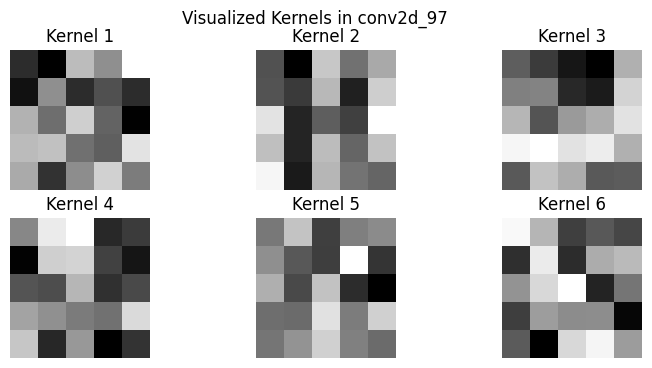

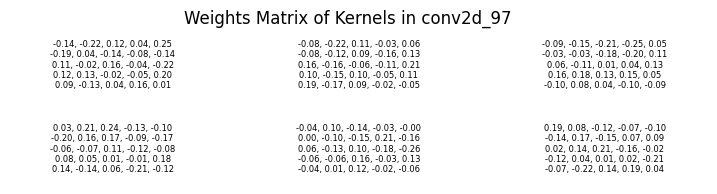

conv2d_98 has weights of shape (5, 5, 6, 16)


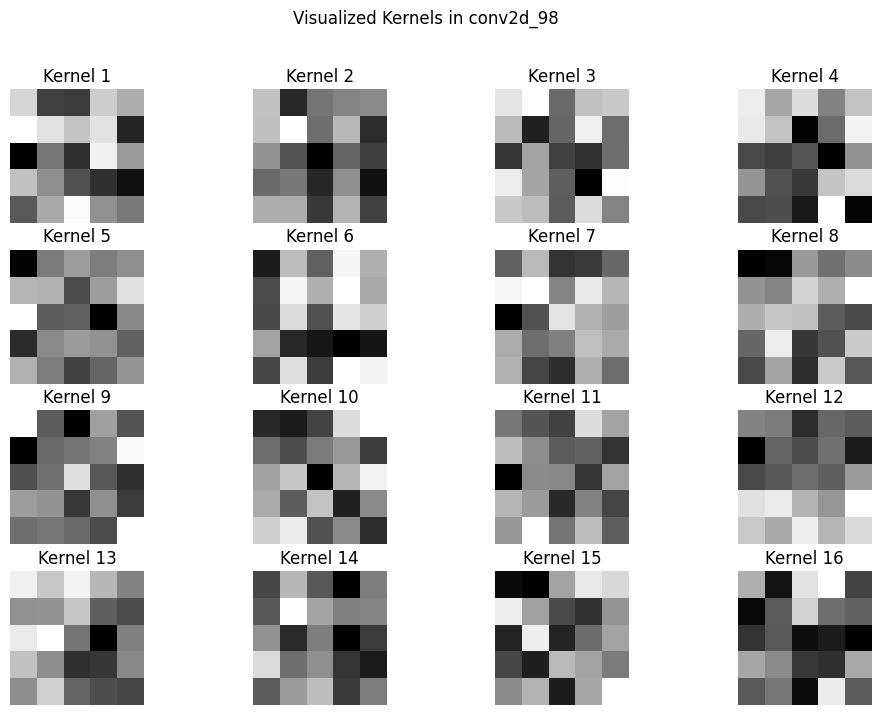

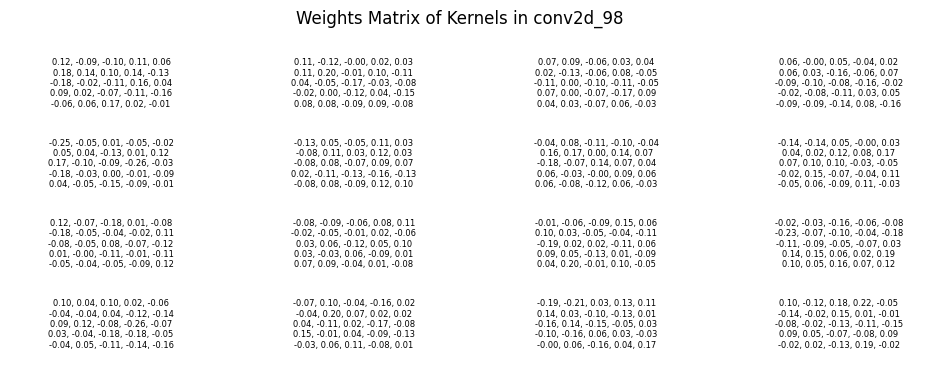

conv2d_99 has weights of shape (5, 5, 16, 120)


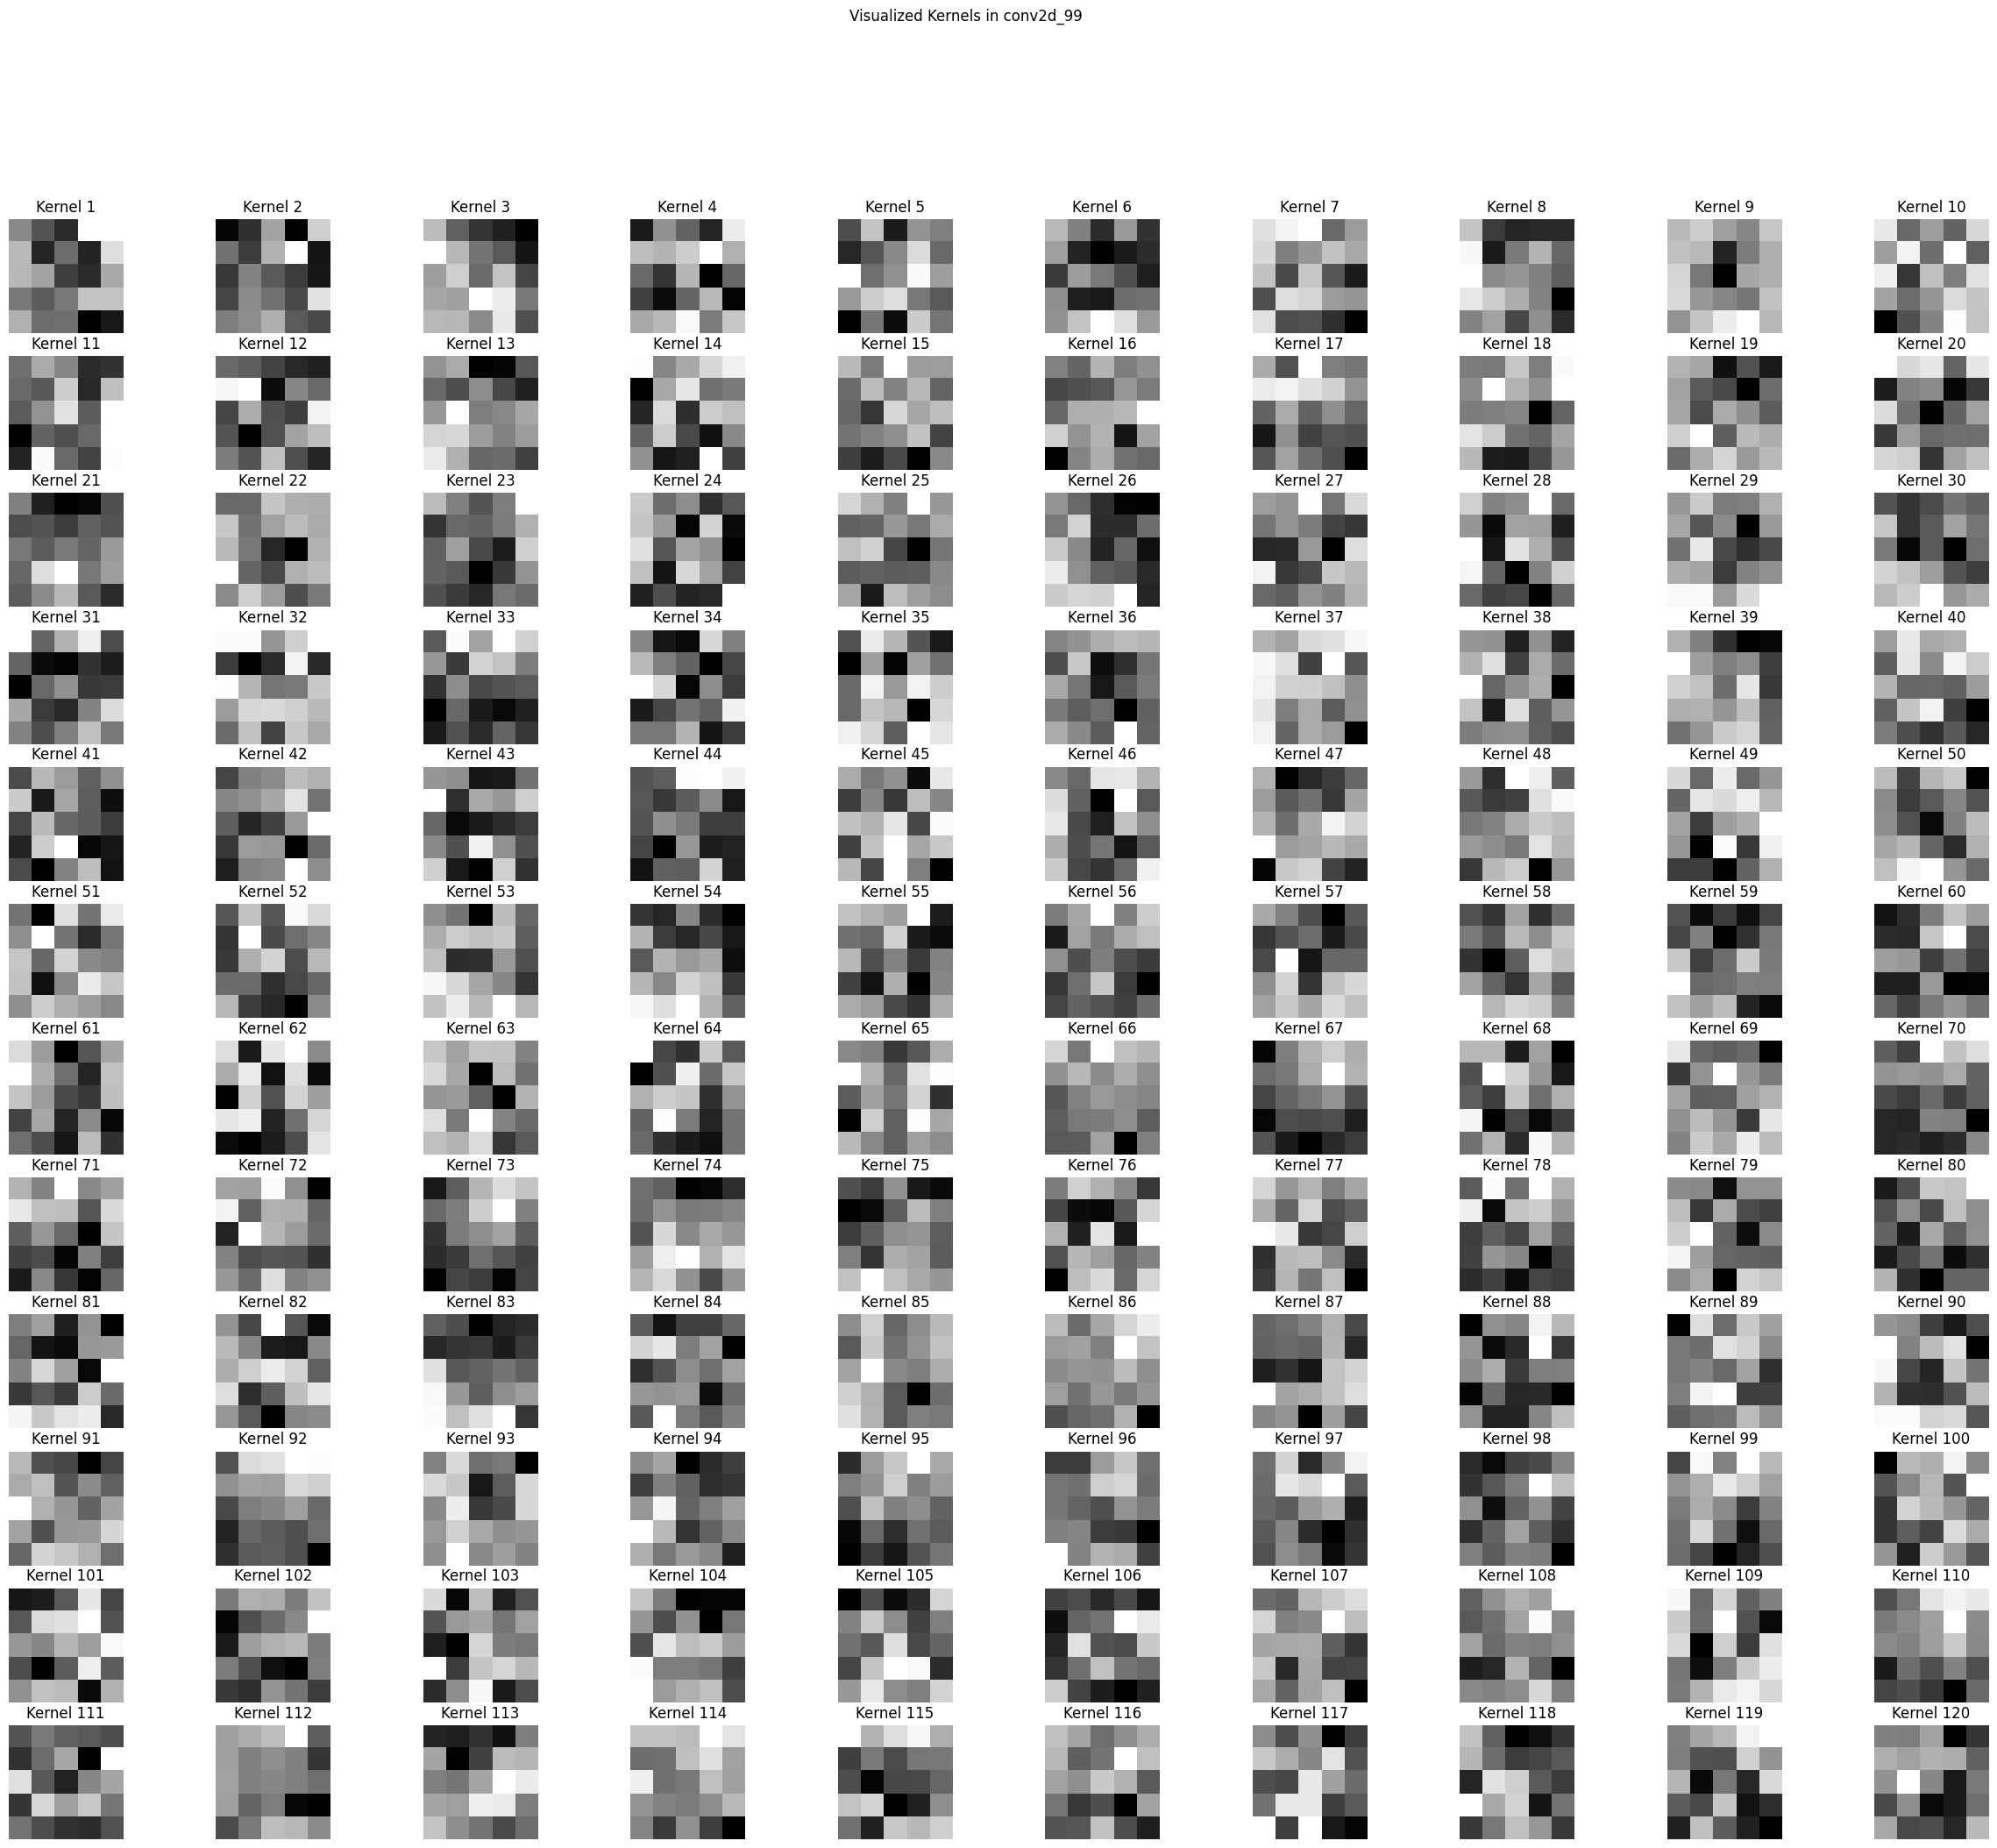

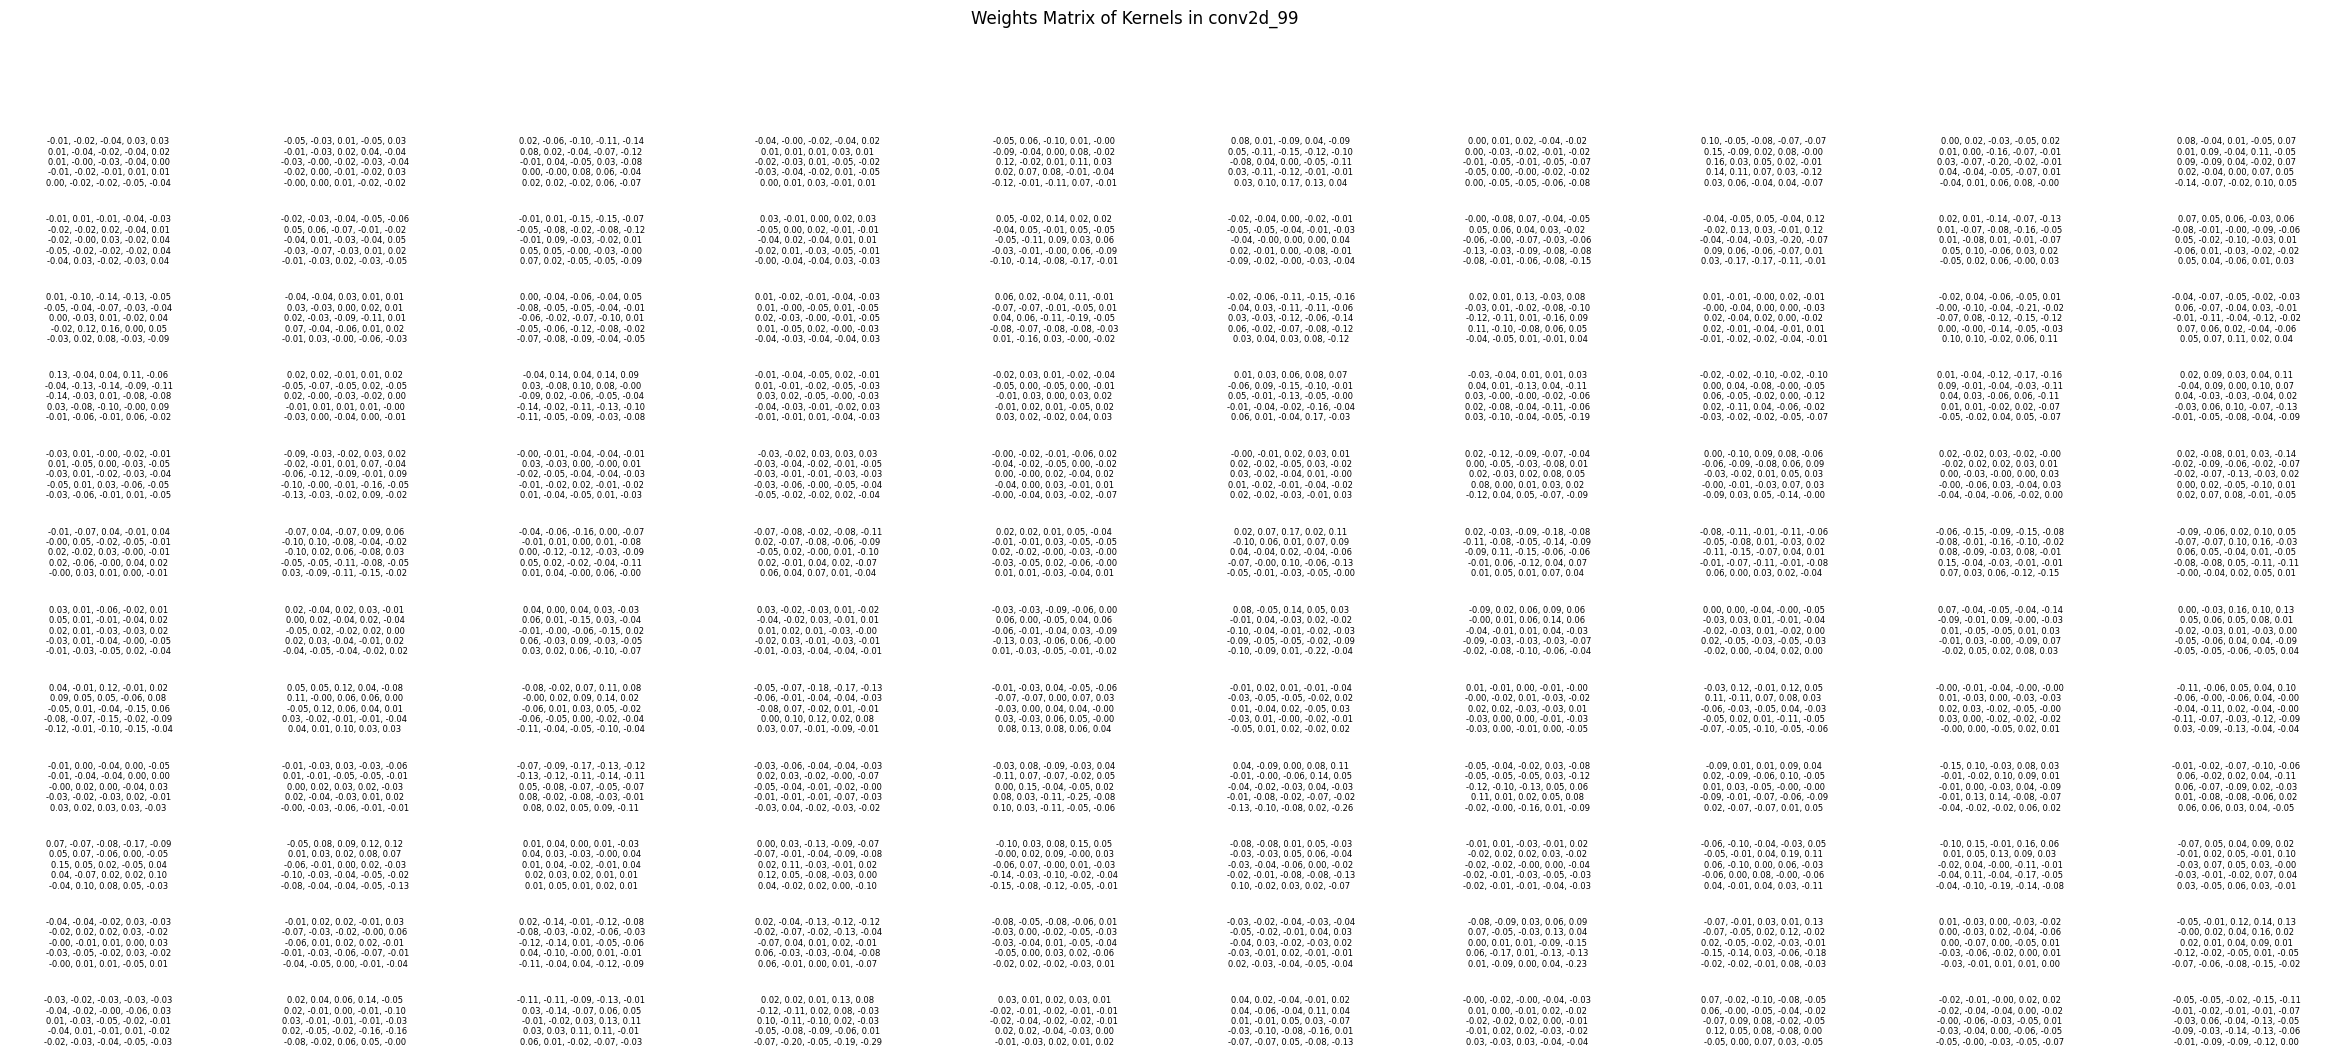

In [ ]:
## Part 3-1) CNN 커널 시각화: 학습된 커널 출력하기
import matplotlib.pyplot as plt
from keras.models import Model

""" 구현 및 수정 대상
    없음
"""


def visualize_kernel_weights(model):
    for layer in model.layers:
        if "conv" in layer.name:  # 컨볼루션 계층 찾기
            weights, biases = layer.get_weights()
            print(f"{layer.name} has weights of shape {weights.shape}")

            num_kernels = weights.shape[3]
            if num_kernels == 6:
                grid_shape = (2, 3)
            elif num_kernels == 16:
                grid_shape = (4, 4)
            elif num_kernels == 120:
                grid_shape = (12, 10)
            else:
                continue

            # 커널 이미지 시각화
            fig, axs = plt.subplots(
                grid_shape[0],
                grid_shape[1],
                figsize=(grid_shape[1] * 3, grid_shape[0] * 2),
            )
            fig.suptitle(f"Visualized Kernels in {layer.name}")
            for i in range(weights.shape[3]):
                ax = axs[i // grid_shape[1], i % grid_shape[1]]
                kernel = weights[:, :, :, i]
                ax.imshow(kernel[:, :, 0], cmap="gray", interpolation="none")
                ax.set_title(f"Kernel {i+1}")
                ax.axis("off")
            plt.show()

            # 커널 가중치 행렬 출력
            fig, axs = plt.subplots(
                grid_shape[0],
                grid_shape[1],
                figsize=(grid_shape[1] * 3, grid_shape[0] * 1),
            )
            fig.suptitle(f"Weights Matrix of Kernels in {layer.name}")
            for i in range(weights.shape[3]):
                ax = axs[i // grid_shape[1], i % grid_shape[1]]
                kernel = weights[:, :, :, i]
                # 가중치 행렬을 텍스트로 출력
                text_str = "\n".join(
                    [
                        ", ".join(
                            f"{kernel[x, y, 0]:.2f}" for y in range(kernel.shape[1])
                        )
                        for x in range(kernel.shape[0])
                    ]
                )
                ax.text(
                    0.5,
                    0.5,
                    text_str,
                    ha="center",
                    va="center",
                    fontsize=6,
                    transform=ax.transAxes,
                )
                ax.axis("off")
            plt.show()


# 모델 생성 및 학습 후 시각화
visualize_kernel_weights(lenet_model)

1/1 [==============================] - 0s 73ms/step


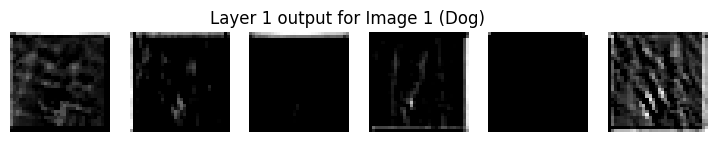

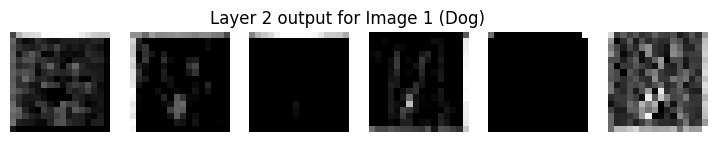

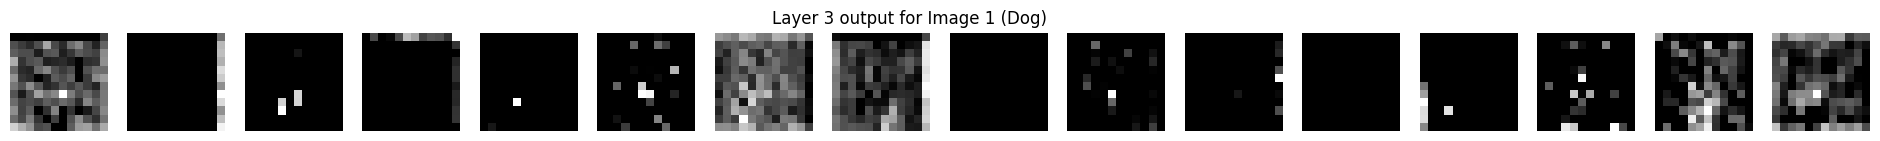

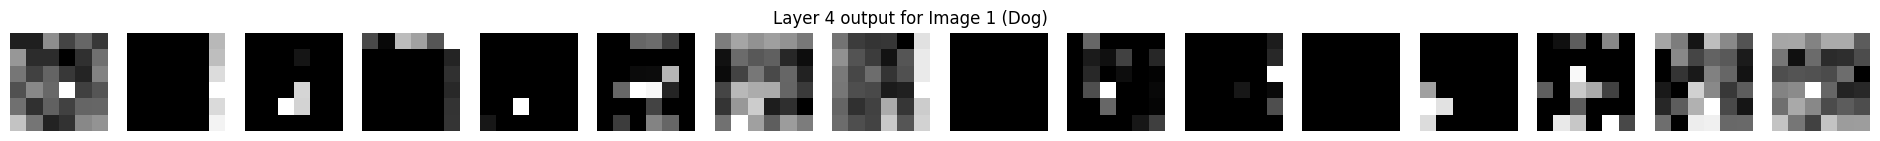

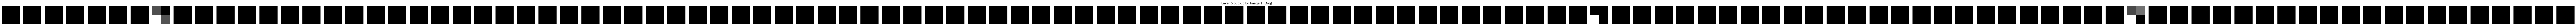

1/1 [==============================] - 0s 108ms/step
Prediction for Image 1 (Dog): Dog with probability 0.6845976114273071
1/1 [==============================] - 0s 77ms/step


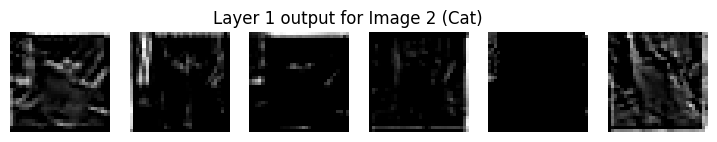

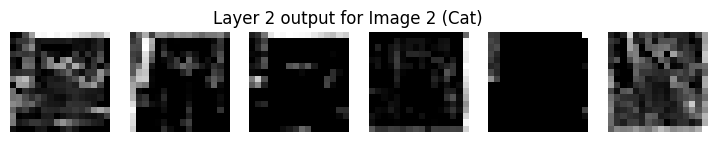

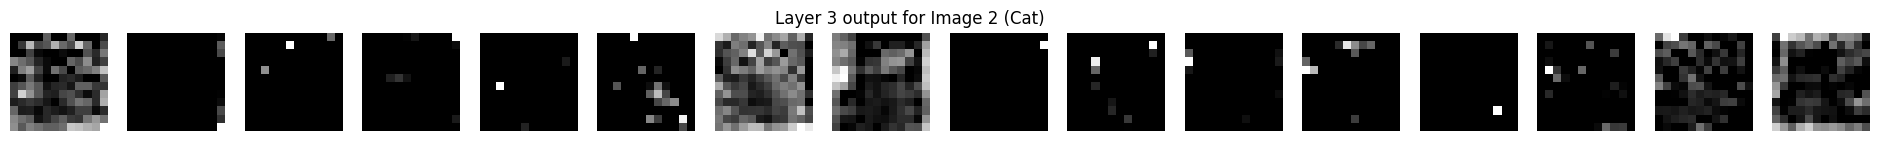

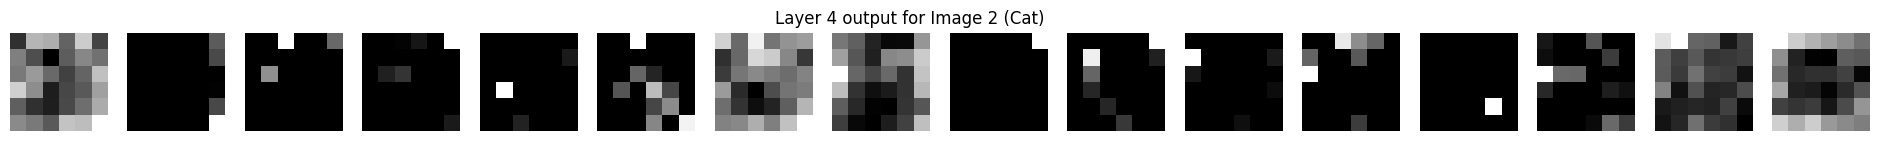

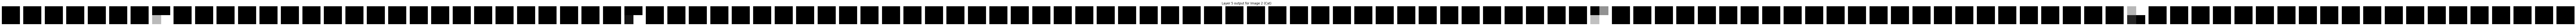

1/1 [==============================] - 0s 26ms/step
Prediction for Image 2 (Cat): Cat with probability 0.48545801639556885


In [ ]:
## Part 3-2) CNN 커널 시각화: 학습된 커널로 예제 사진 가공 및 예측 하기
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Model

""" 구현 및 수정 대상
# a.앞에서 구현한 build_lenet5() 를 기반으로 create_lenet_model()을 완성할 것
# b. preprocess_image() 함수를 완성할 것
"""


def preprocess_image(img):
    """이미지를 모델 입력에 맞게 전처리하는 함수"""
    img = img.convert("L")  # 흑백 변환
    img = np.array(img)  # 이미지를 배열로 변환
    img = np.expand_dims(img, axis=-1)  # 채널 차원 추가
    img = np.expand_dims(img, axis=0)  # 배치 차원 추가
    img = img / 255.0  # 정규화
    return img


def create_lenet_model(lenet_model):
    """CNN 모델 설정 부분: 시작"""
    input_img = Input(shape=(32, 32, 1))
    x = Conv2D(1, (5, 5), activation="sigmoid")(input_img)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(2, (5, 5), activation="sigmoid")(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(3, (5, 5), activation="sigmoid")(x)
    x = Flatten()(x)
    x = Dense(84, activation="sigmoid")(x)
    output = Dense(1, activation="tanh")(x)
    model = Model(inputs=input_img, outputs=output)
    model.load_weights(lenet_model)
    """ CNN 모델 설정 부분: 종료 """
    return model


def visualize_and_predict(model, processed_image, image_title):
    # 중간 계층 출력 추출
    intermediate_layer_model = Model(
        inputs=model.input,
        outputs=[
            layer.output
            for layer in model.layers
            if isinstance(layer, (Conv2D, MaxPooling2D))
        ],
    )
    activations = intermediate_layer_model.predict(processed_image)

    # 활성화 출력 시각화
    for i, activation in enumerate(activations):
        num_filters = activation.shape[-1]
        fig, axs = plt.subplots(1, num_filters, figsize=(num_filters * 1.5, 1.5))
        fig.suptitle(f"Layer {i+1} output for {image_title}")
        for j in range(num_filters):
            axs[j].imshow(activation[0, :, :, j], cmap="gray")
            axs[j].axis("off")
        plt.show()

    # 최종 예측 결과 출력
    prediction = model.predict(processed_image)
    print(
        f"Prediction for {image_title}: {'Cat' if prediction < 0.5 else 'Dog'} with probability {prediction[0][0]}"
    )


image1_resized = image1.resize((32, 32))
image2_resized = image2.resize((32, 32))

image1_processed = preprocess_image(image1_resized)
image2_processed = preprocess_image(image2_resized)

lenet_model.save_weights("lenet_model.h5")
model = create_lenet_model("lenet_model.h5")
intermediate_layer_model = Model(
    inputs=model.input,
    outputs=[
        layer.output
        for layer in model.layers
        if isinstance(layer, (Conv2D, MaxPooling2D))
    ],
)

# 이미지 1과 이미지 2에 대한 활성화 출력 계산 및 시각화
visualize_and_predict(model, image1_processed, "Image 1 (Dog)")
visualize_and_predict(model, image2_processed, "Image 2 (Cat)")

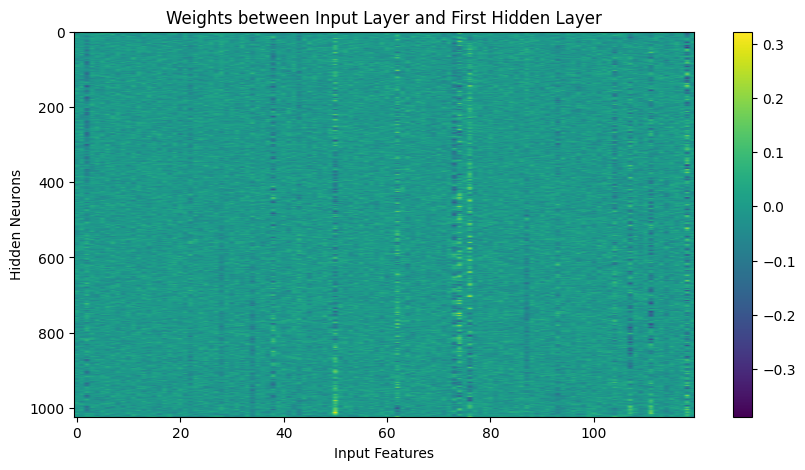

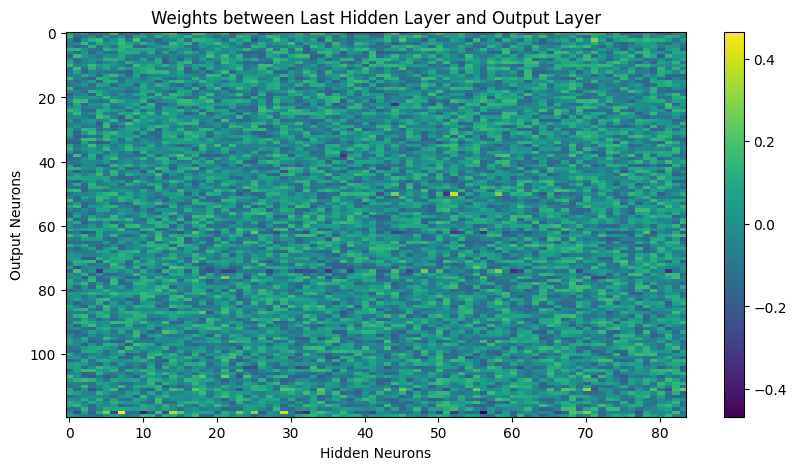

1/1 [==============================] - 0s 30ms/step
Image 1 Prediction: Dog with probability [0.76904726]
Image 1 Hidden Layer Output Shape: (1, 84)
Image 2 Prediction: Cat with probability [0.34642655]
Image 2 Hidden Layer Output Shape: (1, 84)


In [ ]:
## Part 3-3) 참고: MLP로 예제 사진 가공 및 예측하기


def visualize_weights(mlp_model):
    # 입력층과 첫 번째 은닉층 사이의 가중치
    weights_input_hidden = mlp_model.layers[1].get_weights()[
        0
    ]  # 첫 번째 은닉층의 가중치
    plt.figure(figsize=(10, 5))
    plt.imshow(weights_input_hidden, aspect="auto", cmap="viridis")
    plt.colorbar()
    plt.title("Weights between Input Layer and First Hidden Layer")
    plt.xlabel("Input Features")
    plt.ylabel("Hidden Neurons")
    plt.show()

    # 마지막 은닉층과 출력층 사이의 가중치
    weights_hidden_output = mlp_model.layers[-2].get_weights()[
        0
    ]  # 마지막 은닉층의 가중치
    plt.figure(figsize=(10, 5))
    plt.imshow(weights_hidden_output, aspect="auto", cmap="viridis")
    plt.colorbar()
    plt.title("Weights between Last Hidden Layer and Output Layer")
    plt.xlabel("Hidden Neurons")
    plt.ylabel("Output Neurons")
    plt.show()


# 이미지 데이터를 MLP 모델에 전달하여 은닉층의 출력과 최종 예측 결과를 출력하는 함수
def visualize_mlp_output(mlp_model, image1, image2):
    # 이미지 데이터를 MLP 모델에 전달하여 예측 결과를 얻음
    prediction1 = mlp_model.predict(image1)
    prediction2 = mlp_model.predict(image2)

    # 은닉층의 출력을 얻기 위해 모델의 중간 층을 추출
    hidden_layer_model = Model(
        inputs=mlp_model.input, outputs=mlp_model.get_layer("dense_182").output
    )

    # 이미지 데이터를 MLP 모델의 중간 층에 전달하여 은닉층의 출력을 얻음
    hidden_output1 = hidden_layer_model.predict(image1)
    hidden_output2 = hidden_layer_model.predict(image2)

    # 결과 출력
    print(
        f"Image 1 Prediction: {'Cat' if prediction1 < 0.5 else 'Dog'} with probability {prediction1[0]}"
    )
    print("Image 1 Hidden Layer Output Shape:", hidden_output1.shape)
    print(
        f"Image 2 Prediction: {'Cat' if prediction2 < 0.5 else 'Dog'} with probability {prediction2[0]}"
    )
    print("Image 2 Hidden Layer Output Shape:", hidden_output2.shape)


# 가중치 시각화 함수 호출
visualize_weights(mlp_model)

# MLP 모델을 통과시켜 은닉층에서의 출력을 시각화하고 최종 예측 결과를 출력
visualize_mlp_output(mlp_model, image1_processed, image2_processed)